# Random search for successful linear model agent for cart pole environment #

In [1]:
import gym
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

import time

In [2]:
env = gym.make("CartPole-v1")

## Evaluate linear model agent for one episode ##

In [3]:
# run one episode 
def run_episode(weight_vector):
    state = env.reset()
    total_reward = 0
    for _ in np.arange(200):
        # state is a four dimensional vector
        # weight vector is also a four dimensional vector
        # the action is 0 if the inner product of weight vector and state is negative 
        #               1                                                    non-negative
        action = 0 if np.matmul(weight_vector, state) < 0 else 1
        state, reward, done, _ = env.step(action)
        total_reward += reward
        if done:
            break
    return total_reward

## Keep guessing linear model agents till success ##

In [4]:
# returns the number of guesses performed till success and the successful weight vector
def guess_till_success():
    counter = 0
    weight_vector = None
    total_reward = 0
    while total_reward < 200:
        counter += 1
        weight_vector = np.random.rand(4) * 2.0 - 1.0
        total_reward = run_episode(weight_vector)
    return counter, weight_vector

## Plot histogram ##

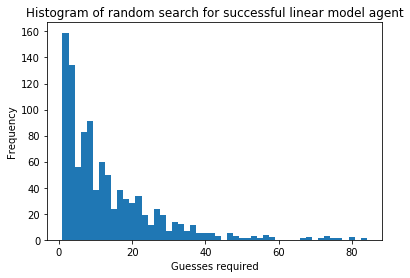

Average number till success: 13.133


In [5]:
# create graphs
counters = []
for guess in np.arange(1000):
    counters.append((guess_till_success())[0])

#https://matplotlib.org/gallery/statistics/histogram_features.html?highlight=histogram
plt.hist(counters, 50)
plt.xlabel('Guesses required')
plt.ylabel('Frequency')
plt.title('Histogram of random search for successful linear model agent')
plt.show()

print("Average number till success:", np.average(counters))

## Plot successful linear model agent ##

In [6]:
counter, weight_vector = guess_till_success()

In [7]:
print("Number of guesses:", counter)
print("Weight vector:", weight_vector)

Number of guesses: 16
Weight vector: [-0.58312821  0.07933592  0.2009757   0.98515449]


In [8]:
total_reward = 0
done = False
state = env.reset()
env.render()
time.sleep(0.1)

for _ in np.arange(200):
    action = 0 if np.matmul(weight_vector, state) < 0 else 1
    state, reward, done, _ = env.step(action)
    total_reward += reward
    env.render()
    time.sleep(0.1)
    if done: break
    
env.close()
print("Total reward:", total_reward)

Total reward: 183.0
